<a href="https://colab.research.google.com/github/Niihaad/ML_Algorithms/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Data Shape (1797, 64)
Label Data Shape (1797,)
X_train (1437, 64)
Y_train (1437,)
X_test (360, 64)
Y_test (360,)


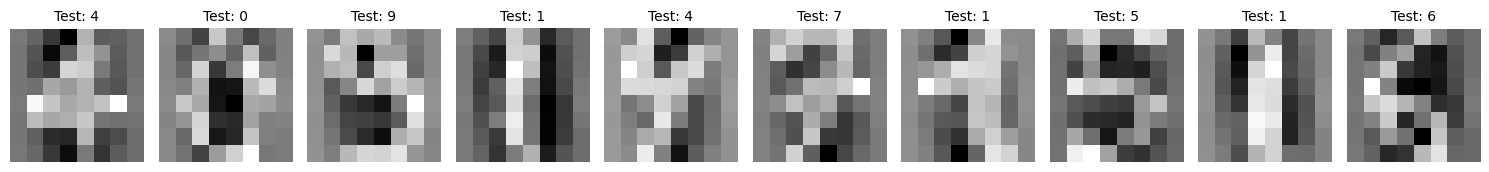

[4]
[4 0 9 1 8 7 1 5 1 6]
[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 8 7 8 3 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 9 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 7 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 4 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 6 8 8 7 6 0 8 0 6 1 5 7 8 0 4 1 4 5]
the score is  0.95
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  1  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  0  0]
 [ 0  0  0  0 30  0  0  1  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0 

Text(0.5, 1.0, 'Accuracy Score: 0.95')

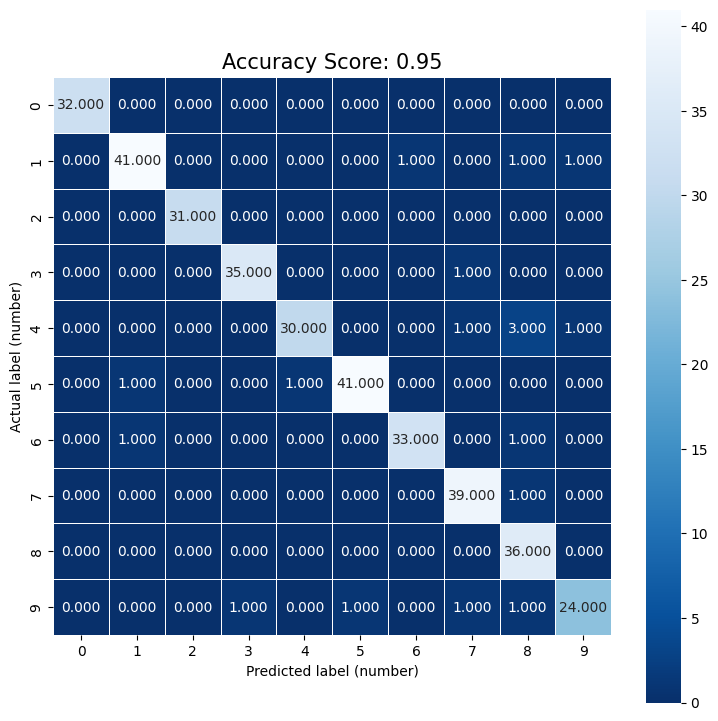

In [1]:
# this step where we import libraries && methods that we will need
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# To display plots directly in the notebook
%matplotlib inline


# Loading the digits dataset
digits = load_digits()

# Then we visualise the total number of images thatwe hve

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

# Then we visualise the 10 first numbers
#plt.figure(figsize=(20,4))
#for index , (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 # plt.subplot(1, 10, index+1)
  #plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  #plt.title('Training: %i\n' % label, fontsize = 20)


  # Now we will divide the dataset into Training(77%) and Test(23%) set
x_train , x_test , y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

#affiche le nombre d'échantillons (images) et la dimension de chaque image dans l'ensemble d'entraînement
print("X_train",x_train.shape)
print("Y_train", y_train.shape)

#affiche le nombre d'échantillons (images) et la dimension de chaque image dans l'ensemble de test
print("X_test",x_test.shape)
print("Y_test", y_test.shape)

#Using the regression model ( importing the Logistic Regression model) and the standarScaller  that will normlize  the data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Making an instance of the model with increased iterations
logisticRegre = LogisticRegression(max_iter=1000)

# Scaling the data : Scaling data normalizes features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)




# Définir le nombre d'échantillons à visualiser
num_samples = 10

# Afficher les échantillons avec leurs étiquettes correspondantes
plt.figure(figsize=(15, 3))
for index, (image, label) in enumerate(zip(x_test_scaled[0:num_samples], y_test[0:num_samples])):
    plt.subplot(1, num_samples, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f'Test: {label}', fontsize=10)
    plt.axis('off')  # Désactiver les axes
plt.tight_layout()
plt.show()



# Training the model on scaled data
logisticRegre.fit(x_train_scaled, y_train)

#Predicting the output of the first element of the test set
print(logisticRegre.predict(x_test_scaled[0].reshape(1,-1)))

#Predicting the output of the first 10 elements of the test set
print(logisticRegre.predict(x_test_scaled[0:10]))


#Predicting the entire dataset
predictions= logisticRegre.predict(x_test_scaled)
print(predictions)

#Determining the accuracy of the model
score =  logisticRegre.score(x_test_scaled,y_test)
print("the score is ",score)

#confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
#Representing the confusion matrix in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label (number)');
plt.xlabel('Predicted label (number)');
plt.title(f'Accuracy Score: {score}', size=15)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Création d'un ensemble de données fictif (exemple)
data = {
    'Heures_Etude': [3, 5, 2, 8, 12, 7, 6, 9, 4, 11],
    'Reussite_Examen': [0, 1, 0, 1, 1, 1, 1, 1, 0, 1]  # 0 pour échec, 1 pour réussite
}

# Création d'un DataFrame à partir des données
df = pd.DataFrame(data)

# Séparation des caractéristiques (X) et des étiquettes (y)
X = df[['Heures_Etude']]
y = df['Reussite_Examen']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation du modèle de régression logistique
logistic_reg = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
logistic_reg.fit(X_train, y_train)
test_data = pd.DataFrame({'Heures_Etude': X_test['Heures_Etude'], 'Reussite_Examen': y_test})

# Affichage des données de test avec leurs étiquettes
print(test_data)
# Prédiction sur l'ensemble de test
predictions = logistic_reg.predict(X_test)
print(predictions)
# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


   Heures_Etude  Reussite_Examen
8             4                0
1             5                1
5             7                1
[0 1 1]
Accuracy: 1.0
